In [39]:
import numpy as np
from numpy.fft import fft2, ifft2
import matplotlib.pyplot as plt
from cv2 import imread, IMREAD_GRAYSCALE, ellipse, filter2D


In [43]:
def inverse_filter(img, h):
    h /= np.sum(h)
    tmp_img = np.copy(img)
    G = fft2(tmp_img)
    H = fft2(h, s = img.shape)
    H += 1e-1 # avoid division by zero 
    F = G / H
    f = np.abs(ifft2(F))
    return f

In [44]:
def motion_blur(image, angle, lenght):
  psf = np.zeros((30, 30))
  psf = ellipse(psf, 
                    (15, 15),
                    (lenght, 0), 
                    angle, 
                    0, 360,
                    (255),
                    thickness=-1)
  psf_norm = psf / psf.sum()
  imfilt = filter2D(image, -1, psf_norm)
  return imfilt,psf

In [45]:
img = imread('lena.jpg', IMREAD_GRAYSCALE)
blurred_img, h = motion_blur(img, 0, 15)
filtered_img = inverse_filter(blurred_img, h)


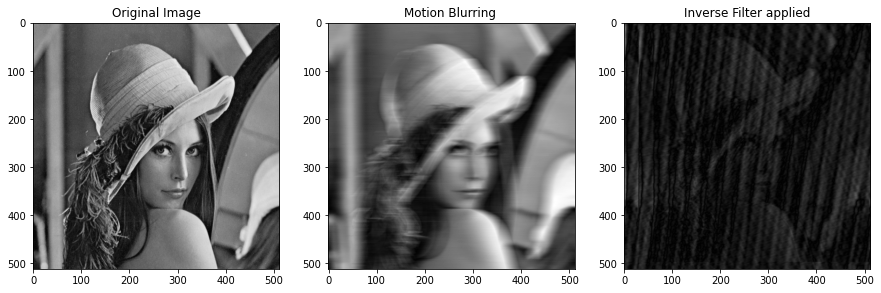

In [46]:
display = [img, blurred_img, filtered_img]
label = ['Original Image', 'Motion Blurring ', 'Inverse Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()